
# Pixel importances

This notebook illustrates how to explain ML methods by quantifying the importances of features. Here, features are pixel intensities of images. 


## Loading the data and model fitting
First, we load the olivetti faces dataset and limit the dataset to contain
only the first five classes. Then we train a random forest on the dataset
and evaluate the impurity-based feature importance. One drawback of this
method is that it cannot be evaluated on a separate test set. For this
example, we are interested in representing the information learned from
the full dataset. Also, we'll set the number of cores to use for the tasks.



In [67]:
from sklearn.datasets import fetch_olivetti_faces

We select the number of cores to use to perform parallel fitting of
the forest model. `-1` means use all available cores.



In [68]:
n_jobs = -1

Load the faces dataset



In [69]:
data = fetch_olivetti_faces()
X, y = data.data, data.target

Limit the dataset to 5 classes.



In [70]:
mask = y < 5
X = X[mask]
y = y[mask]

A random forest classifier will be fitted to compute the feature importances.



In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest.fit(X_train, y_train)
print(accuracy_score(y_test,forest.predict(X_test)))

0.8823529411764706


## Feature importance based on mean decrease in impurity (MDI)
Feature importances are provided by the fitted attribute
`feature_importances_` and they are computed as the mean and standard
deviation of accumulation of the impurity decrease within each tree.

<div class="alert alert-danger"><h4>Warning</h4><p>Impurity-based feature importances can be misleading for **high
    cardinality** features (many unique values). See
    `permutation_importance` as an alternative.</p></div>



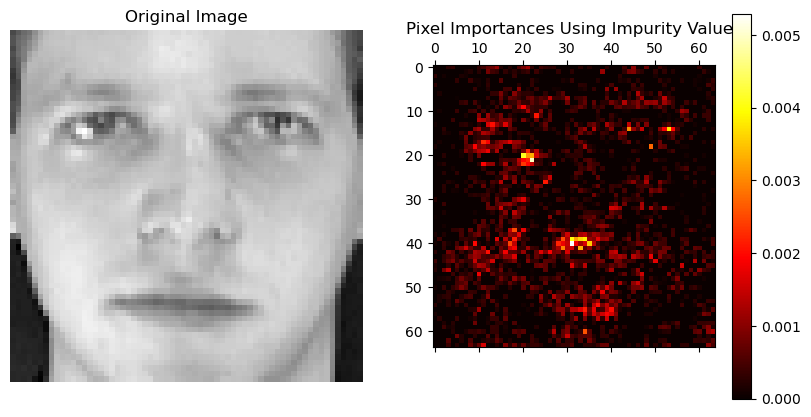

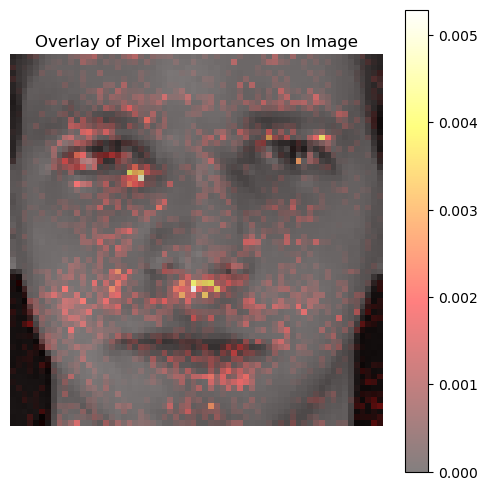

In [72]:
import time

import matplotlib.pyplot as plt

start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
ax[0].imshow(data.images[0], cmap=plt.cm.gray)  # Adjust colormap if needed
ax[0].set_title("Original Image")
ax[0].axis('off')  # Turn off axis labels and ticks

# Display the heatmap of feature importances in the second subplot
cax = ax[1].matshow(importances.reshape(img_shape), cmap=plt.cm.hot)
ax[1].set_title("Pixel Importances Using Impurity Values")
fig.colorbar(cax, ax=ax[1])

plt.show()

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Display the original image
ax.imshow(data.images[0], cmap=plt.cm.gray, interpolation='nearest')  # Adjust colormap if needed

# Overlay the heatmap of feature importances
# Use alpha to adjust the transparency level of the heatmap
cax = ax.imshow(importances.reshape(img_shape), cmap=plt.cm.hot, alpha=0.5, interpolation='nearest')

# Add a colorbar to show the scale of importances
fig.colorbar(cax, ax=ax)

ax.set_title("Overlay of Pixel Importances on Image")
ax.axis('off')  # Turn off axis labels and ticks

plt.show()

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Train logistic regression classifier
clf = LogisticRegression(max_iter=1, tol=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
coefficients = clf.coef_

score =accuracy_score(y_test,clf.predict(X_test))

print(score)

# Visualize the pixel importances from the logistic regression coefficients





0.11764705882352941


/Users/junga1/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(400, 4096)
True label of test data point  3
predicted label of test data point 
[2]


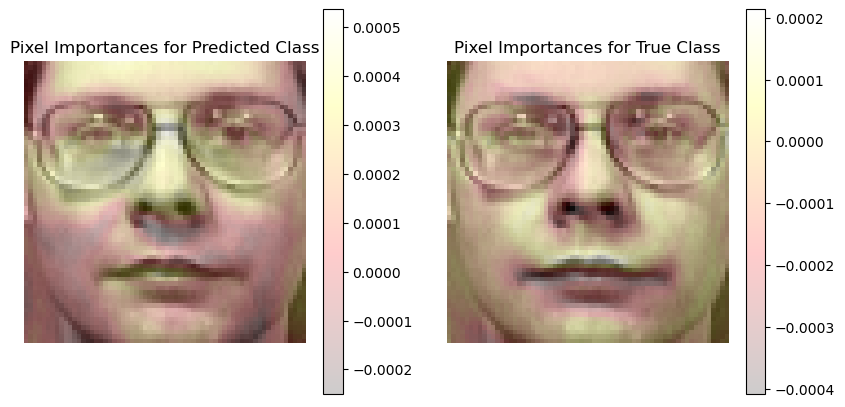

In [74]:
datapointnr = 2

truey = y_test[datapointnr] 
testimg = X_test[datapointnr].reshape(64,64)
print(data.data.shape)
print("True label of test data point ",truey)
print("predicted label of test data point ") 
yhat = clf.predict(data.data[datapointnr].reshape(1,-1))
print(yhat)


# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
ax[0].imshow(testimg, cmap=plt.cm.gray, interpolation='nearest')  # Adjust colormap if needed
ax[0].axis('off')  # Turn off axis labels and ticks
# Overlay the heatmap of feature importances
# Use alpha to adjust the transparency level of the heatmap
cax = ax[0].imshow(coefficients[yhat].reshape(testimg.shape), cmap=plt.cm.hot, alpha=0.2, interpolation='nearest')
# Add a colorbar to show the scale of importances
fig.colorbar(cax, ax=ax[0])


ax[1].imshow(testimg, cmap=plt.cm.gray, interpolation='nearest')  # Adjust colormap if needed
ax[1].axis('off')  # Turn off axis labels and ticks
# Overlay the heatmap of feature importances
# Use alpha to adjust the transparency level of the heatmap
cax = ax[1].imshow(coefficients[truey].reshape(testimg.shape), cmap=plt.cm.hot, alpha=0.2, interpolation='nearest')
# Add a colorbar to show the scale of importances
# Display the heatmap of feature importances in the second subplot
#cax = ax[1].matshow(importances.reshape(img_shape), cmap=plt.cm.hot)
#ax[1].set_title("Pixel Importances Using Impurity Values")
fig.colorbar(cax, ax=ax[1])



ax[0].set_title("Pixel Importances for Predicted Class")
ax[0].axis('off')  # Turn off axis labels and ticks
ax[1].set_title("Pixel Importances for True Class")
ax[1].axis('off')  # Turn off axis labels and ticks

plt.show()
